# **Mushroom Edibility Study**

## Objectives

* Answer business requirement 1:
    * The client would like to better understand the patterns in the mushroom database so that the client can learn the variables of an mushroom most likely to be edible. 

## Inputs

* outputs/datasets/collection/mushrooms.csv

## Outputs

* Generate code and seaborn plots that answer business requirement 1 and can be used for the Streamlit App


---

# Change working directory

* Need to change working directory from the current jupyter_notebooks folder to the parent folder in order to access the whole project

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/mushroom-safety/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspace/mushroom-safety'

# Load Data

Load in the dataset to a dataframe.

In [5]:
import pandas as pd
df = pd.read_csv("outputs/datasets/collection/mushrooms.csv")
df.head()

,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
1,1,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,1,pendant,brown,numerous,grasses
2,1,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,1,pendant,brown,numerous,meadows


---

# Data Exploration #

We wish to become familiar with the dataset, check variable types and their distribution, check for any missing data, and to understand what these variables mean in the business context

In [ ]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

`veil-type` is a clearly redundant variable, as all mushrooms in the dataset have the same value, 'p' - partial. As such it will be dropped.

In [6]:
df = df.drop(['veil-type'], axis=1)
df.head()

,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,smooth,white,white,white,1,pendant,black,scattered,urban
1,1,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,smooth,white,white,white,1,pendant,brown,numerous,grasses
2,1,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,smooth,white,white,white,1,pendant,brown,numerous,meadows
3,0,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,smooth,white,white,white,1,pendant,black,scattered,urban
4,1,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,smooth,white,white,white,1,evanescent,brown,abundant,grasses


---

## Correlation study - Which Mushroom Variable Categories Correlate Most to Edibility

We will use `OneHotEncoder` to find which variable category (eg. mushroom with `odor=none`, mushroom with `stalk-color-above-ring=silky`) correlates strongest to edibility.

In [ ]:
from feature_engine.encoding import OneHotEncoder

cols = df.columns[df.dtypes=='object'].to_list()

encoder = OneHotEncoder(variables=cols)
df_ohe = encoder.fit_transform(df)

df_ohe.head()

Will now run Pearson and Spearman correlations to check which variable categories correlate most to `edible`

In [ ]:
corr_spearman = df_ohe.corr(method='spearman')['edible'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

In [ ]:
corr_pearson = df_ohe.corr(method='pearson')['edible'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

According to this correlation study, a mushroom having no odor is the most strongly correlated to edibility, with a Spearman correlation coefficient of 0.79 and Pearson coefficient of 0.79. Hence mushrooms with no odor are  typically edible. If the mushroom has a silky consistency above the ring is also strongly negatively correlated to a mushroom being edible, with a Spearman correlation coefficient of -0.59 and Pearson correlation coefficient of -0.59. Hence mushrooms with a silky consistency on the stalk above the ring are typically poisonous.

## Correlation Study - Which Mushroom Categories are Most Relevant for Plotting

We can use `OrdinalEncoder` to transform categorical variables into integer values, so they may be numerically correlated to `edible`. This will allow the measuring of how entire varaiable correlates to ediblity (e.g. `odor`), rather than only individual variable categories as with `OneHotEncoder` previously (e.g. `odor=none`). Firstly, determining the categeorical variables in the dataset, and storing their labels in a string:

In [8]:
df_oe = df.copy()
cols = df.columns[df.dtypes=='object'].to_list()

cat_list=[]

for col in cols:
    print(col)
    print(df[col].unique())
    cat_list.append(list(df[col].unique()))

cap-shape
['convex' 'bell' 'sunken' 'flat' 'knobbed' 'conical']
cap-surface
['smooth' 'scaly' 'fibrous' 'grooves']
cap-color
['brown' 'yellow' 'white' 'gray' 'red' 'pink' 'buff' 'purple' 'cinnamon'
 'green']
bruises
['bruises' 'no']
odor
['pungent' 'almond' 'anise' 'none' 'foul' 'creosote' 'fishy' 'spicy'
 'musty']
gill-attachment
['free' 'attached']
gill-spacing
['close' 'crowded']
gill-size
['narrow' 'broad']
gill-color
['black' 'brown' 'gray' 'pink' 'white' 'chocolate' 'purple' 'red' 'buff'
 'green' 'yellow' 'orange']
stalk-shape
['enlarging' 'tapering']
stalk-root
['equal' 'club' 'bulbous' 'rooted' 'missing']
stalk-surface-above-ring
['smooth' 'fibrous' 'silky' 'scaly']
stalk-surface-below-ring
['smooth' 'fibrous' 'scaly' 'silky']
stalk-color-above-ring
['white' 'gray' 'pink' 'brown' 'buff' 'red' 'orange' 'cinnamon' 'yellow']
stalk-color-below-ring
['white' 'pink' 'gray' 'buff' 'brown' 'red' 'yellow' 'orange' 'cinnamon']
veil-color
['white' 'brown' 'orange' 'yellow']
ring-type
['pe

In order to pass these categories names as a list to the ordinal encoder, `cat_list` will be used.

In [9]:
print(cat_list)

[['convex', 'bell', 'sunken', 'flat', 'knobbed', 'conical'], ['smooth', 'scaly', 'fibrous', 'grooves'], ['brown', 'yellow', 'white', 'gray', 'red', 'pink', 'buff', 'purple', 'cinnamon', 'green'], ['bruises', 'no'], ['pungent', 'almond', 'anise', 'none', 'foul', 'creosote', 'fishy', 'spicy', 'musty'], ['free', 'attached'], ['close', 'crowded'], ['narrow', 'broad'], ['black', 'brown', 'gray', 'pink', 'white', 'chocolate', 'purple', 'red', 'buff', 'green', 'yellow', 'orange'], ['enlarging', 'tapering'], ['equal', 'club', 'bulbous', 'rooted', 'missing'], ['smooth', 'fibrous', 'silky', 'scaly'], ['smooth', 'fibrous', 'scaly', 'silky'], ['white', 'gray', 'pink', 'brown', 'buff', 'red', 'orange', 'cinnamon', 'yellow'], ['white', 'pink', 'gray', 'buff', 'brown', 'red', 'yellow', 'orange', 'cinnamon'], ['white', 'brown', 'orange', 'yellow'], ['pendant', 'evanescent', 'large', 'flaring', 'none'], ['black', 'brown', 'purple', 'chocolate', 'white', 'green', 'orange', 'yellow', 'buff'], ['scattered

The above can be input into the `categories` argument of `OrdinalEncoder`.

In [10]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=cat_list)
encoded_array = encoder.fit_transform(df[cols])

for i, col in enumerate(cols):
    df_oe[col] = encoded_array[:,i]

df_oe.head()

,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0
1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,1.0,1.0,1.0
2,1,1.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,1.0,1.0,2.0


We will now run the correlation methods on the encoded dataframe, using both spearman and spearman methods, in order to determine the variables in the dataset most relevant to the target, `edible`

In [11]:
corr_spearman = df_oe.corr(method='spearman')['edible'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

odor                       -0.771088
ring-type                  -0.579335
spore-print-color          -0.555944
gill-size                   0.540024
stalk-surface-above-ring   -0.536555
bruises                    -0.501530
stalk-surface-below-ring   -0.500008
gill-color                 -0.399424
gill-spacing                0.348387
stalk-root                 -0.341438
Name: edible, dtype: float64

In [12]:
corr_pearson = df_oe.corr(method='pearson')['edible'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

odor                       -0.582015
spore-print-color          -0.560715
ring-type                  -0.556515
stalk-surface-above-ring   -0.552044
gill-size                   0.540024
stalk-surface-below-ring   -0.532452
bruises                    -0.501530
gill-color                 -0.412869
gill-spacing                0.348387
stalk-root                 -0.337542
Name: edible, dtype: float64

There is an issue with extracting correlation coefficients from this method of encoding; it varies depending on ordering, which is determined purely by the order in which categories appear in the original dataframe and is thus entirely arbitrary. To illustrate this, we will randomize the ordering of the list elements in `cat_list`:

In [13]:
import random
random.seed(123)
print(cat_list)
for cat in cat_list:
    random.shuffle(cat)
print(cat_list)

[['convex', 'bell', 'sunken', 'flat', 'knobbed', 'conical'], ['smooth', 'scaly', 'fibrous', 'grooves'], ['brown', 'yellow', 'white', 'gray', 'red', 'pink', 'buff', 'purple', 'cinnamon', 'green'], ['bruises', 'no'], ['pungent', 'almond', 'anise', 'none', 'foul', 'creosote', 'fishy', 'spicy', 'musty'], ['free', 'attached'], ['close', 'crowded'], ['narrow', 'broad'], ['black', 'brown', 'gray', 'pink', 'white', 'chocolate', 'purple', 'red', 'buff', 'green', 'yellow', 'orange'], ['enlarging', 'tapering'], ['equal', 'club', 'bulbous', 'rooted', 'missing'], ['smooth', 'fibrous', 'silky', 'scaly'], ['smooth', 'fibrous', 'scaly', 'silky'], ['white', 'gray', 'pink', 'brown', 'buff', 'red', 'orange', 'cinnamon', 'yellow'], ['white', 'pink', 'gray', 'buff', 'brown', 'red', 'yellow', 'orange', 'cinnamon'], ['white', 'brown', 'orange', 'yellow'], ['pendant', 'evanescent', 'large', 'flaring', 'none'], ['black', 'brown', 'purple', 'chocolate', 'white', 'green', 'orange', 'yellow', 'buff'], ['scattered

With the newly ordered list, rerun the encoding:

In [14]:
encoder = OrdinalEncoder(categories=cat_list)
encoded_array = encoder.fit_transform(df[cols])
df_new_oe = df.copy()

for i, col in enumerate(cols):
    df_new_oe[col] = encoded_array[:,i]

df_new_oe.head()

,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,5.0,3.0,5.0,1.0,7.0,0.0,0.0,1.0,11.0,...,0.0,3.0,1.0,0.0,2.0,1,2.0,6.0,1.0,0.0
1,1,5.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,11.0,...,0.0,3.0,1.0,0.0,2.0,1,2.0,8.0,0.0,4.0
2,1,2.0,3.0,6.0,1.0,8.0,0.0,0.0,0.0,10.0,...,0.0,3.0,1.0,0.0,2.0,1,2.0,8.0,0.0,2.0


And rerun the correlation methods:

In [15]:
print(f"Old Spearman correlation coefficients:\n{corr_spearman}")
new_corr_spearman = df_new_oe.corr(method='spearman')['edible'].sort_values(key=abs, ascending=False)[1:].head(10)
print(f"New Spearman correlation coefficients:\n{new_corr_spearman}")

Old Spearman correlation coefficients:
odor                       -0.771088
ring-type                  -0.579335
spore-print-color          -0.555944
gill-size                   0.540024
stalk-surface-above-ring   -0.536555
bruises                    -0.501530
stalk-surface-below-ring   -0.500008
gill-color                 -0.399424
gill-spacing                0.348387
stalk-root                 -0.341438
Name: edible, dtype: float64
New Spearman correlation coefficients:
odor                        0.620185
spore-print-color           0.576683
gill-size                  -0.540024
bruises                     0.501530
stalk-surface-below-ring    0.500008
stalk-color-above-ring     -0.442066
stalk-surface-above-ring   -0.430460
gill-spacing                0.348387
ring-number                 0.214119
population                 -0.206662
Name: edible, dtype: float64


In [16]:
print(f"Old Pearson correlation coefficients:\n{corr_pearson}")
new_corr_pearson = df_new_oe.corr(method='pearson')['edible'].sort_values(key=abs, ascending=False)[1:].head(10)
print(f"New Pearson correlation coefficients:\n{new_corr_pearson}")

Old Pearson correlation coefficients:
odor                       -0.582015
spore-print-color          -0.560715
ring-type                  -0.556515
stalk-surface-above-ring   -0.552044
gill-size                   0.540024
stalk-surface-below-ring   -0.532452
bruises                    -0.501530
gill-color                 -0.412869
gill-spacing                0.348387
stalk-root                 -0.337542
Name: edible, dtype: float64
New Pearson correlation coefficients:
spore-print-color           0.587716
gill-size                  -0.540024
stalk-surface-below-ring    0.532452
bruises                     0.501530
stalk-color-above-ring     -0.430185
odor                        0.425185
stalk-surface-above-ring   -0.412093
gill-spacing                0.348387
stalk-root                 -0.249313
ring-number                 0.214366
Name: edible, dtype: float64


The correlation coefficients have very clearly changed from changing the order in which categories are encoded, and may result in us selecting different variables as the most correlated to `edible`. As such, we would prefer an encoder which is wholly agnostic with respect to the ordering of the dataset, and is based on some immutable statistical reality of the data. To do this, we use a `TargetEncoder`, which encodes each category based on their frequency in the positive result for the target. In the case of this dataset this is how frequently a mushroom of each category type is edible, eg. for encoding `cap-shape=bell`, as 53.2823% of all mushrooms with a `cap-shape=bell` have `edible=1`, `cap-shape=bell` is encoded as `cap-shape=0.532823`. For demonstration, view the output of the following 2 code cells.

In [18]:
df.head()

,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,smooth,white,white,white,1,pendant,black,scattered,urban
1,1,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,smooth,white,white,white,1,pendant,brown,numerous,grasses
2,1,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,smooth,white,white,white,1,pendant,brown,numerous,meadows
3,0,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,smooth,white,white,white,1,pendant,black,scattered,urban
4,1,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,smooth,white,white,white,1,evanescent,brown,abundant,grasses


In [17]:
from category_encoders import TargetEncoder
encoder = TargetEncoder()
df_te = df.copy()

for col in cols:
    df_te[col] = encoder.fit_transform(df[col], df['edible'])

df_te.head()

,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0.532823,0.447574,0.553415,0.815166,2.917126e-11,0.507455,0.441574,0.114650,0.843137,...,0.703246,0.688817,0.616487,0.616788,0.506815,1,0.794355,0.880342,0.705128,0.260870
1,1,0.532823,0.447574,0.373134,0.815166,1.000000e+00,0.507455,0.441574,0.698503,0.843137,...,0.703246,0.688817,0.616487,0.616788,0.506815,1,0.794355,0.886179,1.000000,0.655493
2,1,0.893805,0.447574,0.692308,0.815166,1.000000e+00,0.507455,0.441574,0.698503,0.893130,...,0.703246,0.688817,0.616487,0.616788,0.506815,1,0.794355,0.886179,1.000000,0.876712
3,0,0.532823,0.463625,0.692308,0.815166,2.917126e-11,0.507455,0.441574,0.114650,0.893130,...,0.703246,0.688817,0.616487,0.616788,0.506815,1,0.794355,0.880342,0.705128,0.260870
4,1,0.532823,0.447574,0.560870,0.306655,9.659864e-01,0.507455,0.914634,0.698503,0.843137,...,0.703246,0.688817,0.616487,0.616788,0.506815,1,0.363112,0.886179,1.000000,0.655493


We now repeat the correlation methods for the dataset with the new encoding method.

In [19]:
corr_spearman = df_te.corr(method='spearman')['edible'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

odor                        0.915786
spore-print-color           0.711126
gill-color                  0.667413
ring-type                   0.600686
stalk-surface-above-ring    0.553563
gill-size                   0.540024
stalk-surface-below-ring    0.532934
stalk-color-above-ring      0.517833
stalk-color-below-ring      0.509739
bruises                     0.501530
Name: edible, dtype: float64

In [20]:
corr_pearson = df_te.corr(method='pearson')['edible'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

odor                        0.970937
spore-print-color           0.752599
gill-color                  0.680456
ring-type                   0.603147
stalk-surface-above-ring    0.587908
stalk-surface-below-ring    0.574837
gill-size                   0.540024
stalk-color-above-ring      0.524131
stalk-color-below-ring      0.514109
bruises                     0.501530
Name: edible, dtype: float64

This encoding method appears to provide much higher correlation constants than with ordinal encoding, which are also immutable as there is no way to alter the nature of the encoding. Hence these coefficients will be used to provide insight on which variables correlate most with edibility. 

It appears that there are few variables that have strong correlation to whether the mushrooms are edible or poisonous, with the strongest being `odor` with its correlation coefficient being 0.92 when calculated by the Spearman method, 0.97 when calculated by Pearson. As there are no numerical variables among the top 10 in either, such correlation coefficients do not show a relationship between two measured variables, but rather how strongly different categorical properties of the mushrooms can be said to indicate edibility. 

In [21]:
top_n = 5
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'gill-color',
 'odor',
 'ring-type',
 'spore-print-color',
 'stalk-surface-above-ring'}

Therefore we will study the following variables. We will investigate if:

* Mushrooms with `buff` for `gill color` are most liable to be poisonous
* Mushrooms with `foul` for `odor` are most liable to be poisonous
* Mushrooms with `pendant` for `ring-type` have the best chance of being edible
* Mushrooms with `buff` for `spore-print-color` have the best chance of being edible
* Mushrooms with `silky` for `stalk-surface-above-ring` are most liable to be poisonous

In [22]:
vars_to_study = ['gill-color',
                'odor',
                'ring-type',
                'spore-print-color',
                'stalk-surface-above-ring']
vars_to_study

['gill-color',
 'odor',
 'ring-type',
 'spore-print-color',
 'stalk-surface-above-ring']

---

# EDA on selected variables

In [24]:
df_eda = df.filter(vars_to_study + ['edible'])
df_eda.head()

,gill-color,odor,ring-type,spore-print-color,stalk-surface-above-ring,edible
0,black,pungent,pendant,black,smooth,0
1,black,almond,pendant,brown,smooth,1
2,brown,anise,pendant,brown,smooth,1
3,brown,pungent,pendant,black,smooth,0
4,black,none,evanescent,brown,smooth,1


## Variables Distibution by Edibility

Plotting the distributions (categorical) coloured by `edible`, recalling that poisonous=0, edible=1:

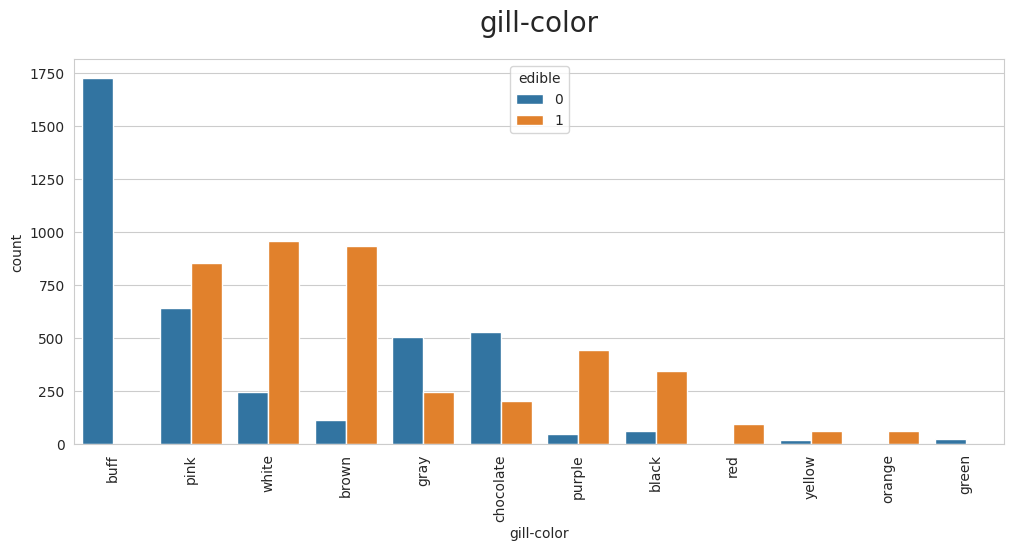

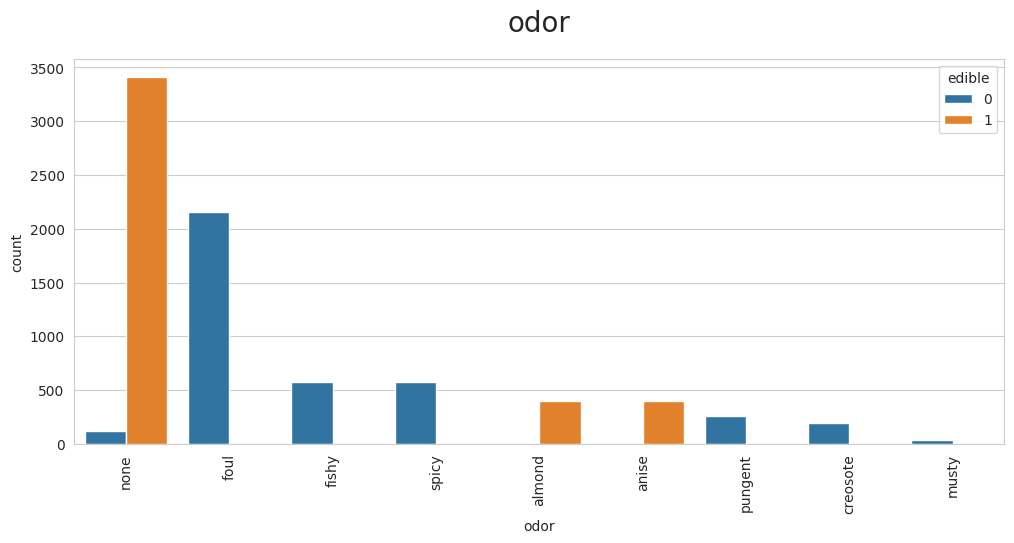

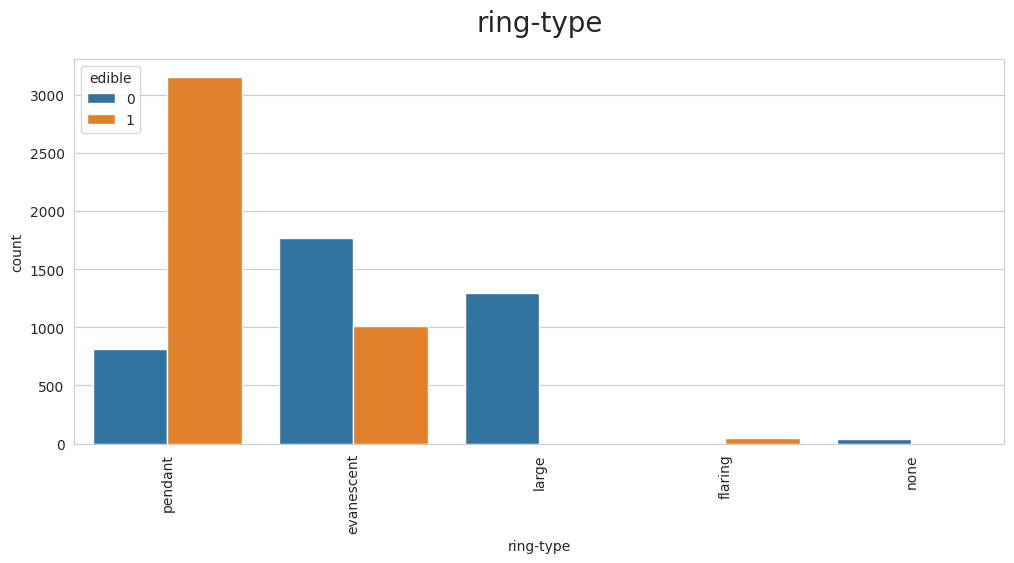

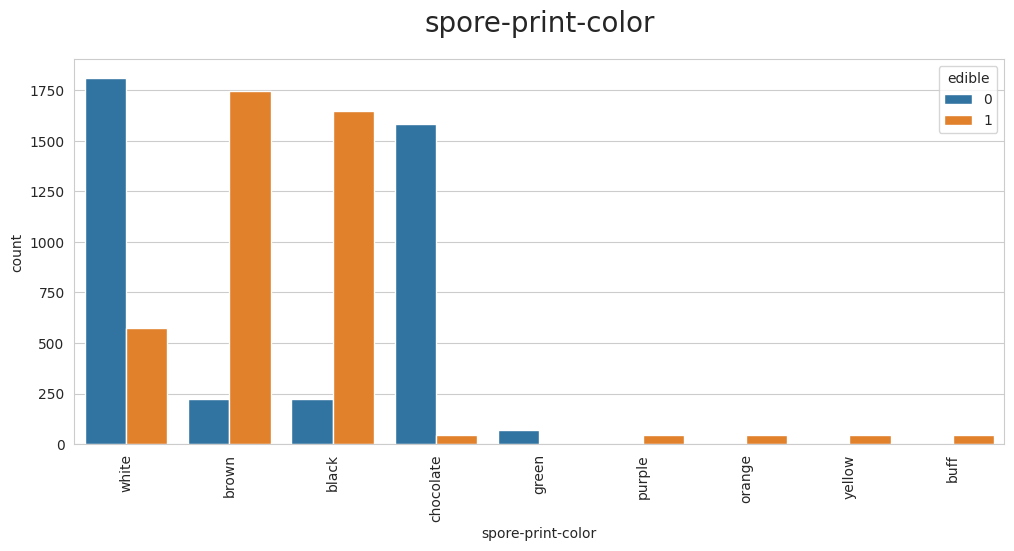

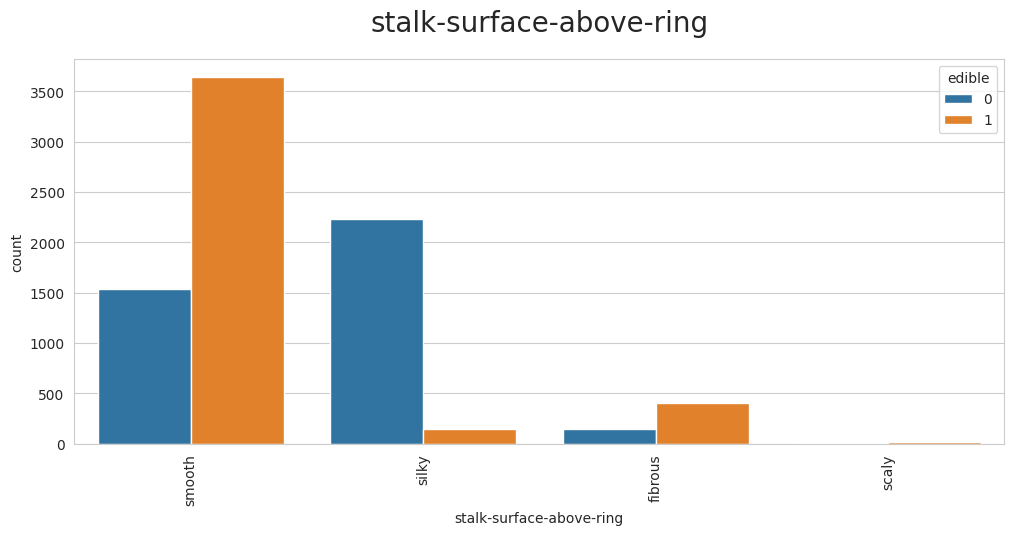

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


def plot_categorical(df, col, target_var):

    plt.figure(figsize=(12, 5))
    sns.countplot(data=df, x=col, hue=target_var, order=df[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()


def plot_numerical(df, col, target_var):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue=target_var, kde=True, element="step")
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()


target_var = 'edible'
for col in vars_to_study:
    if df_eda[col].dtype == 'object':
        plot_categorical(df_eda, col, target_var)
        print("\n\n")
    else:
        plot_numerical(df_eda, col, target_var)
        print("\n\n")

## Parellel Plot

Creates multi-dimensional categorical data plot

In [30]:
import plotly.express as px
fig = px.parallel_categories(df_eda, color="edible")
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

---

# Conclusions

The correlations and plot interpretations converge, in that it can be observed that the selected categories appear to be significant predictors of whether mushrooms are edible or not. It was found that:

* Mushrooms with `b` (brown) for `gill color` are most liable to be poisonous
* Mushrooms with `f` (foul) for `odor` are most liable to be poisonous
* Mushrooms with `p` (pendant) for `ring-type` have the best chance of being edible
* Mushrooms with `b` (brown) for `spore-print-color` have the best chance of being edible
* Mushrooms with `k` (silky) for `stalk-surface-above-ring` are most liable to be poisonous